In [1]:
import pyes
import elasticsearch
   

conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()

tsf = pyes.filters.TermsFilter(field="text",values=["cve","vulnerability","exploit","virus","worm","shell","zombie","malware","rootkit","trojan"])

fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(fq)
bq.add_must(rq)


result = conn.search(query=bq, indices="twitter2", doc_types="tweet")

len(result)

4057

In [2]:
import json
import pyes
import elasticsearch

conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()
tsf = pyes.filters.TermsFilter(field="text",values=["cve","vulnerability","exploit","virus","worm","shell","zombie","malware","rootkit","trojan"])
fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)
ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)
bq.add_must(fq)
bq.add_must(rq)

tagg = pyes.aggs.TermsAgg('uid',field='uid')

qsearch = pyes.query.Search(bq)

qsearch.agg.add(tagg)

rs = conn.search(query=qsearch, index="twitter2",type="tweet")

result_twitter = rs.aggs['uid']['buckets']
print len(result_twitter)


94


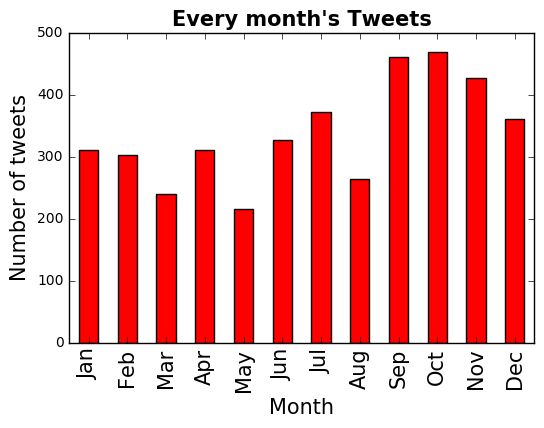

In [3]:
import pyes
import elasticsearch
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()

tsf = pyes.filters.TermsFilter(field="text",values=["cve","vulnerability","exploit","virus","worm","shell","zombie","malware","rootkit","trojan"])

fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(fq)
bq.add_must(rq)

result = conn.search(query=bq, indices="twitter2", doc_types="tweet")

tweets = pd.DataFrame()
tweets['created_at_month'] = map(lambda tweet: tweet['created_at'][4:7], result)
tweets_by_month = tweets['created_at_month'].value_counts()
tweets_by_month_ordered = tweets_by_month.reindex(index =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Every month\'s Tweets', fontsize=15, fontweight='bold')
tweets_by_month_ordered.plot(ax=ax, kind='bar', color='red')

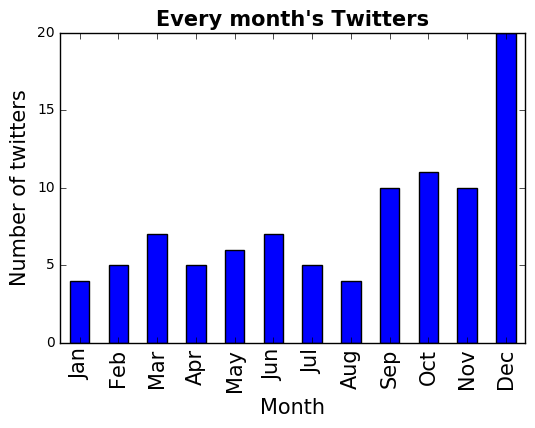

In [4]:
import pyes
import elasticsearch
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()

tsf = pyes.filters.TermsFilter(field="text",values=["cve","vulnerability","exploit","virus","worm","shell","zombie","malware","rootkit","trojan"])

fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(fq)
bq.add_must(rq)

result = conn.search(query=bq, indices="twitter2", doc_types="tweet")

month_twitter = []
twitters = set()
tweets = pd.DataFrame()
for j in range(0,len(result)):
    if result[j]['uid'] not in twitters:
        month_twitter.append(result[j]['created_at'][4:7])
        twitters.add(result[j]['uid'])
        
tweets['twitter_created_at_month'] = map(lambda tweet: tweet, month_twitter)
twitter_by_month = tweets['twitter_created_at_month'].value_counts()
twitter_by_month_ordered = twitter_by_month.reindex(index =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of twitters' , fontsize=15)
ax.set_title('Every month\'s Twitters', fontsize=15, fontweight='bold')
twitter_by_month_ordered.plot(ax=ax, kind='bar', color='blue')

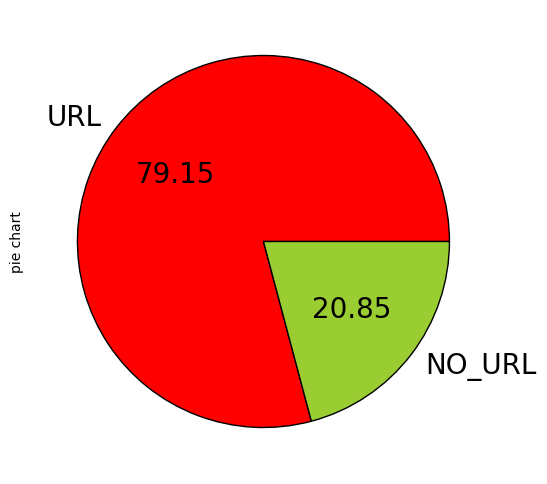

In [5]:
import pyes
import elasticsearch
from matplotlib import pyplot as plt 
  
conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()

tsf = pyes.filters.TermsFilter(field="text",values=["cve","vulnerability","exploit","virus","worm","shell","zombie","malware","rootkit","trojan"])

fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)

ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_must(fq)
bq.add_must(rq)


result = conn.search(query=bq, indices="twitter2", doc_types="tweet")

no_url = []

for i in range(0,len(result)):
    if (not result[i]['entities']['urls']):
        no_url.append(result[i]['id'])

labels = [u'URL',u'NO_URL']
sizes = [len(result)-len(no_url),len(no_url)]
colors = ['red','yellowgreen']

series = pd.Series(sizes, index = labels, name='pie chart')
#print len(result)-len(no_url)
series.plot.pie(labels=labels, colors=colors, autopct='%.2f', fontsize=20, figsize=(6, 6))


In [8]:
import json
import pyes
import elasticsearch
import operator
import pandas as pd
from bokeh.plotting import figure, show, output_file


def create_no_repeate_list(l):
    list2 = []
    for n in l:
        if n in list2:
            list2.remove(n)
        list2.append(n)
    return list2

def count_times(l):
    dic = {}
    list2 = create_no_repeate_list(l)
    for n in list2:
        dic[n] = 0
    
    for n in l:
        count = 0
        if n in dic:
            dic[n] += 1    
    return dic


conn = pyes.es.ES('localhost:9200')
bq = pyes.query.BoolQuery()
tsf = pyes.filters.TermFilter(field="text",value="cve")
fq = pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)
ESR = pyes.ESRange(field="created_at", from_value="Wed Jan 1 14:54:26 +0000 2014", to_value="Wed Dec 31 15:20:20 +0000 2014", 
                   include_lower=True ,include_upper=False)
rq = pyes.query.RangeQuery(qrange=ESR)
bq.add_must(fq)
bq.add_must(rq)
tagg1 = pyes.aggs.TermsAgg('uid',field='uid')
qsearch = pyes.query.Search(bq)
qsearch.agg.add(tagg1)

result_uid_peryear = conn.search(query=qsearch, index="twitter2",type="tweet")
result_tweet_peryear = conn.search(query=bq, indices="twitter2", doc_types="tweet")

tweet_uid = []
tweet_month = []
twitters = set()
tweets = pd.DataFrame()
tweets_ordered_uid_month = pd.DataFrame()

for i in range(0,len(result_tweet_peryear)):
    tweet_month.append(result_tweet_peryear[i]['created_at'][4:7])
    tweet_uid.append(result_tweet_peryear[i]['uid'])
    
list_month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tweets['month'] = tweet_month
tweets['uid'] = tweet_uid
Jan_list = []
Feb_list = []
Mar_list = []
Apr_list = []
Apr_list = []
May_list = []
Jun_list = []
Jul_list = []
Aug_list = []
Sep_list = []
Oct_list = []
Nov_list = []
Dec_list = []

for index, row in tweets.iterrows():
    if row['month'] == 'Jan': Jan_list.append(row['uid'])
    if row['month'] == 'Feb': Feb_list.append(row['uid']) 
    if row['month'] == 'Mar': Mar_list.append(row['uid']) 
    if row['month'] == 'Apr': Apr_list.append(row['uid']) 
    if row['month'] == 'May': May_list.append(row['uid']) 
    if row['month'] == 'Jun': Jun_list.append(row['uid']) 
    if row['month'] == 'Jul': Jul_list.append(row['uid']) 
    if row['month'] == 'Aug': Aug_list.append(row['uid']) 
    if row['month'] == 'Sep': Sep_list.append(row['uid']) 
    if row['month'] == 'Oct': Oct_list.append(row['uid']) 
    if row['month'] == 'Nov': Nov_list.append(row['uid'])
    if row['month'] == 'Dec': Dec_list.append(row['uid'])

count_Jan = count_times(Jan_list)
count_Feb = count_times(Feb_list)
count_Mar = count_times(Mar_list)
count_Apr = count_times(Apr_list)
count_May = count_times(May_list)
count_Jun = count_times(Jun_list)
count_Jul = count_times(Jul_list)
count_Aug = count_times(Aug_list)
count_Sep = count_times(Sep_list)
count_Oct = count_times(Oct_list)
count_Nov = count_times(Nov_list)
count_Dec = count_times(Dec_list)

Hi_in_month = [max(count_Jan.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Feb.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Mar.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Apr.iteritems(), key=operator.itemgetter(1))[1],
              max(count_May.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Jun.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Jul.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Aug.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Sep.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Oct.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Nov.iteritems(), key=operator.itemgetter(1))[1],
              max(count_Dec.iteritems(), key=operator.itemgetter(1))[1]]
Low_in_month = [min(count_Jan.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Feb.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Mar.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Apr.iteritems(), key=operator.itemgetter(1))[1],
              min(count_May.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Jun.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Jul.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Aug.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Sep.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Oct.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Nov.iteritems(), key=operator.itemgetter(1))[1],
              min(count_Dec.iteritems(), key=operator.itemgetter(1))[1]]
Avg_in_month = [sum(count_Jan.values())/float(len(count_Jan)),
               sum(count_Feb.values())/float(len(count_Feb)),
               sum(count_Mar.values())/float(len(count_Mar)),
               sum(count_Apr.values())/float(len(count_Apr)),
               sum(count_May.values())/float(len(count_May)),
               sum(count_Jun.values())/float(len(count_Jun)),
               sum(count_Jul.values())/float(len(count_Jul)),
               sum(count_Aug.values())/float(len(count_Aug)),
               sum(count_Sep.values())/float(len(count_Sep)),
               sum(count_Oct.values())/float(len(count_Oct)),
               sum(count_Nov.values())/float(len(count_Nov)),
               sum(count_Dec.values())/float(len(count_Dec))]

df_Jan = pd.DataFrame(count_Jan.values()).rename(columns={0:'times'})
df_Feb = pd.DataFrame(count_Feb.values()).rename(columns={0:'times'})
df_Mar = pd.DataFrame(count_Mar.values()).rename(columns={0:'times'})
df_Apr = pd.DataFrame(count_Apr.values()).rename(columns={0:'times'})
df_May = pd.DataFrame(count_May.values()).rename(columns={0:'times'})
df_Jun = pd.DataFrame(count_Jun.values()).rename(columns={0:'times'})
df_Jul = pd.DataFrame(count_Jul.values()).rename(columns={0:'times'})
df_Aug = pd.DataFrame(count_Aug.values()).rename(columns={0:'times'})
df_Sep = pd.DataFrame(count_Sep.values()).rename(columns={0:'times'})
df_Oct = pd.DataFrame(count_Oct.values()).rename(columns={0:'times'})
df_Nov = pd.DataFrame(count_Nov.values()).rename(columns={0:'times'})
df_Dec = pd.DataFrame(count_Dec.values()).rename(columns={0:'times'})

df_Jan['month'] = 'Jan'
df_Feb['month'] = 'Feb'
df_Mar['month'] = 'Mar'
df_Apr['month'] = 'Apr'
df_May['month'] = 'May'
df_Jun['month'] = 'Jun'
df_Jul['month'] = 'Jul'
df_Aug['month'] = 'Aug'
df_Sep['month'] = 'Sep'
df_Oct['month'] = 'Oct'
df_Nov['month'] = 'Nov'
df_Dec['month'] = 'Dec'

df_All = df_Jan.append(df_Feb).append(df_Mar).append(df_Apr).append(df_May).append(df_Jun).append(df_Jul).append(df_Aug).append(df_Sep).append(df_Oct).append(df_Nov).append(df_Dec)
groups_All = df_All.groupby('month')
q1_All = groups_All.quantile(q=0.25).reset_index(list_month)
q2_All = groups_All.quantile(q=0.5).reset_index(list_month)
q3_All = groups_All.quantile(q=0.75).reset_index(list_month)
#print df_All
upper_All = pd.DataFrame(data = Hi_in_month, index = list_month).rename(columns={0:'times'})
lower_All = pd.DataFrame(data = Low_in_month, index = list_month).rename(columns={0:'times'})
avg_All = pd.DataFrame(data = Avg_in_month, index = list_month).rename(columns={0:'times'})

def outliers(group):
    month = group.name
    return group[(group.times > upper_All.loc[month]['times']) | (group.times < lower_All.loc[month]['times'])]['times']

out = groups_All.apply(outliers).dropna()


if not out.empty:
    outx = []
    outy = []
    for month in list_month:
        if not out.loc[month].empty:
            for value in out[month]:
                outx.append(month)
                outy.append(value)

p = figure(tools="save", background_fill_color="#EFE8E2", title="BoxPlot", x_range=list_month)
# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups_All.quantile(q=0.00)
qmax = groups_All.quantile(q=1.00)

upper_All.times = [min([x,y]) for (x,y) in zip(qmax.loc[:,'times'].index.tolist(),upper_All.times)]
lower_All.times = [max([x,y]) for (x,y) in zip(qmin.loc[:,'times'].index.tolist(),lower_All.times)]
# stems
p.segment(list_month, upper_All.times, list_month, q3_All.times, line_width=2, line_color="black")
p.segment(list_month, lower_All.times, list_month, q1_All.times, line_width=2, line_color="black")

# boxes
p.rect(list_month, (q3_All.times+q2_All.times)/2, 0.7, q3_All.times-q2_All.times,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(list_month, (q2_All.times+q1_All.times)/2, 0.7, q2_All.times-q1_All.times,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(list_month, lower_All.times, 0.2, 0.01, line_color="black")
p.rect(list_month, upper_All.times, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

output_file("boxplot.html", title="boxplot.py example")

show(p)


# 作業第2題第g小題分析
# 資安弱點分析帳號可以從箱形圖中觀察出：在某幾個月中(以本題所獲數據來看有3,9,10,11月)某些帳號出現異常多的發文，這些帳號可能有資安弱點存在，
# 造成發文頻率異常現象。

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:194: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:195: DeprecationWarning: unorderable dtypes; returning scalar but in the future this will be an error
INFO:bokeh.core.state:Session output file 'boxplot.html' already exists, will be overwritten.
